# Comparison offline and GPF

In [1]:
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
offline_modpept_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/HpHRP/MQ/100FDR_PSM/combined/txt/modificationSpecificPeptides.txt'
offline_modpept = pd.read_csv(offline_modpept_path,
                               sep='\t')
offline_msscan_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/HpHRP/MQ/100FDR_PSM/combined/txt/msScans.txt'
offline_msscan = pd.read_csv(offline_msscan_path,
                               sep='\t')
offline_evidence_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/HpHRP/MQ/100FDR_PSM/combined/txt/evidence.txt'
offline_evidence = pd.read_csv(offline_evidence_path,
                               sep='\t')

In [3]:
offline_modpept_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/HpHRP/MQ/combined/txt/modificationSpecificPeptides.txt'
offline_modpept = pd.read_csv(offline_modpept_path,
                               sep='\t')
offline_msscan_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/HpHRP/MQ/combined/txt/msScans.txt'
offline_msscan = pd.read_csv(offline_msscan_path,
                               sep='\t')
offline_evidence_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/HpHRP/MQ/combined/txt/evidence.txt'
offline_evidence = pd.read_csv(offline_evidence_path,
                               sep='\t')

/tmp/ipykernel_11484/3427630283.py:8: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  offline_evidence = pd.read_csv(offline_evidence_path,


In [4]:
GPF_modpept_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/GPF/MQ/standard/combined/txt/modificationSpecificPeptides.txt'
GPF_modpept = pd.read_csv(GPF_modpept_path,
                               sep='\t')
GPF_modpept['ModPept'] = GPF_modpept['Sequence']+GPF_modpept['Modifications']
GPF_msscan_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/GPF/MQ/standard/combined/txt/msScans.txt'
GPF_msscan = pd.read_csv(GPF_msscan_path,
                               sep='\t')
GPF_evidence_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/GPF/MQ/standard/combined/txt/evidence.txt'
GPF_evidence = pd.read_csv(GPF_evidence_path,
                               sep='\t')

In [5]:
DDA_modpept_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/MQ/combined/txt/modificationSpecificPeptides.txt'
DDA_modpept = pd.read_csv(DDA_modpept_path,
                               sep='\t')
DDA_modpept['ModPept'] = DDA_modpept['Sequence']+DDA_modpept['Modifications']
DDA_msscan_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/MQ/combined/txt/msScans.txt'
DDA_msscan = pd.read_csv(DDA_msscan_path,
                               sep='\t')
DDA_evidence_path = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/ss/DDA/MQ/combined/txt/evidence.txt'
DDA_evidence = pd.read_csv(DDA_evidence_path,
                               sep='\t')

# ID counts

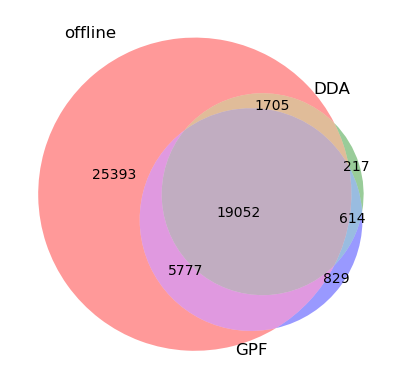

In [6]:
from matplotlib_venn import venn3
venn3([set(offline_evidence["Modified sequence"].to_list()),
       set(DDA_evidence["Modified sequence"].to_list()),
       set(GPF_evidence['Modified sequence'])],
           set_labels=("offline","DDA","GPF"))

# Isotope pattern similarity

In [10]:
maxquant_file_dict = '/mnt/cmnfs/proj/ORIGINS/data/ecoli/HpHRP/MQ/combined/txt/evidence_1_transfer_RT_pred_filtered_withIso.pkl'
maxquant_result_dict = pd.read_pickle(maxquant_file_dict)

In [11]:
maxquant_result_dict = maxquant_result_dict.groupby(['Modified sequence']).first().reset_index()

In [ ]:
from optimization.dictionary import GetNumHighCorrFeatures
AsDict = maxquant_result_dict[['']]